<a href="https://colab.research.google.com/github/tuliod12/Course----Python-for-Industry-4.0/blob/main/Python_For_Industry_4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Curso de python para indústria 4.0:

In [ ]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
#leitura de csv
dataset_location = "https://pycourse.s3.amazonaws.com/abm_globalsteel.csv"
data_original = pd.read_csv(dataset_location,
                            sep = ";",
                            header = 2,
                            thousands = ',')

In [ ]:
#primeiras N linhas do dataframe
#produção de aço bruto (1000 ton)
data_original.head(10)

,Country,2017,2018,2019,2020,2021
0,Albania,0.0,0.0,0.0,0.0,0.0
1,Algeria,415.0,2300.0,2400.0,4000.0,4200.0
2,Angola,0.0,0.0,0.0,0.0,0.0
3,Argentina,4624.3,5161.8,4644.5,3651.1,4875.1
4,Armenia,0.0,0.0,0.0,0.0,0.0
5,Australia,5327.9,5688.8,5492.8,5490.5,5779.6
6,Austria,8134.6,6885.0,7423.5,6765.1,7884.0
7,Azerbaijan,180.0,200.0,200.0,200.0,200.0
8,Bahrain,0.0,720.0,700.0,700.0,700.0
9,Bangladesh,3500.0,3800.0,5100.0,5500.0,5500.0


In [ ]:
# info básicas
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  125 non-null    object 
 1   2017     125 non-null    float64
 2   2018     125 non-null    float64
 3   2019     125 non-null    float64
 4   2020     125 non-null    float64
 5   2021     125 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.0+ KB


In [ ]:
#removendo os países que n produziram aço:
production_sum = data_original.iloc[:,1:].sum(axis = 1) #axis 1 significa que ta somando as colunas

In [ ]:
production_sum

0            0.0
1        13315.0
2            0.0
3        22956.8
4            0.0
         ...    
120       3790.2
121        682.2
122      87332.2
123    9269395.4
124          0.0
Length: 125, dtype: float64

In [ ]:
condition = production_sum > 0

In [ ]:
condition

0      False
1       True
2      False
3       True
4      False
       ...  
120     True
121     True
122     True
123     True
124    False
Length: 125, dtype: bool

In [ ]:
#indexação booleana:
data_original = data_original[condition]

In [ ]:
data_original

,Country,2017,2018,2019,2020,2021
1,Algeria,415.0,2300.0,2400.0,4000.0,4200.0
3,Argentina,4624.3,5161.8,4644.5,3651.1,4875.1
5,Australia,5327.9,5688.8,5492.8,5490.5,5779.6
6,Austria,8134.6,6885.0,7423.5,6765.1,7884.0
7,Azerbaijan,180.0,200.0,200.0,200.0,200.0
...,...,...,...,...,...,...
119,Uruguay,57.8,60.0,62.3,49.1,62.8
120,Uzbekistan,654.0,646.0,666.0,939.2,885.0
121,Venezuela,443.8,129.0,50.8,29.2,29.4
122,Vietnam,11473.0,15471.0,17469.0,19900.0,23019.2


In [ ]:
#como nao precisou do loop, ganha-se em desempenho computacional.
#convertendo as colunas de anos para linhas rexhape usando o método .melt:
data_reshaped = data_original.melt(id_vars = ['Country'],
                                   var_name = 'Year',
                                   value_name = 'production')

In [ ]:
data_reshaped

,Country,Year,production
0,Algeria,2017,415.0
1,Argentina,2017,4624.3
2,Australia,2017,5327.9
3,Austria,2017,8134.6
4,Azerbaijan,2017,180.0
...,...,...,...
440,Uruguay,2021,62.8
441,Uzbekistan,2021,885.0
442,Venezuela,2021,29.4
443,Vietnam,2021,23019.2


In [ ]:
#transformando para Mt:
data_reshaped['Production'] = round(data_reshaped['production']/1000)

In [ ]:
data_reshaped


,Country,Year,production,Production
0,Algeria,2017,415.0,0.0
1,Argentina,2017,4624.3,5.0
2,Australia,2017,5327.9,5.0
3,Austria,2017,8134.6,8.0
4,Azerbaijan,2017,180.0,0.0
...,...,...,...,...
440,Uruguay,2021,62.8,0.0
441,Uzbekistan,2021,885.0,1.0
442,Venezuela,2021,29.4,0.0
443,Vietnam,2021,23019.2,23.0


In [ ]:
#Plotando a produção de aço por ano:
fig = px.line(data_reshaped,
              x = 'Year',
              y = 'production',
              color = 'Country',
              title = 'Produção anual de aço entre 2017 e 2021, em Mt')

In [ ]:
fig

In [ ]:
fig_map = px.scatter_geo(data_reshaped,
                         locations = 'Country',
                         color = 'Country',
                         locationmode = 'country names',
                         hover_name = 'Country',
                         size = 'production',
                         size_max = 100,
                         animation_frame = 'Year',
                         projection = 'natural earth'
                         )
fig_map.update_layout( title = {'text': 'Produção total de aço bruto, Mt',
                                'y': 0.95,
                                'x':0.5,
                                'xanchor': 'center',
                                'yanchor': 'top'})

In [ ]:
#agrupando dados por pais:
data_agragated_sum = data_reshaped.groupby("Country",
                                           as_index = False).agg("sum")
  #Ordenando por produção do menor para o maior:
data_agragated_sum = data_agragated_sum.sort_values(by = 'production',
                                                    ascending = False)     
                                      


In [ ]:
data_agragated_sum

,Country,production,Production
88,World,9269395.4,9269.0
14,China,4892720.2,4893.0
30,India,540577.9,539.0
35,Japan,487785.0,487.0
83,United States,414504.3,416.0
...,...,...,...
78,Tunisia,250.0,0.0
72,Sri Lanka,150.0,0.0
56,Paraguay,125.7,0.0
38,Kenya,100.0,0.0


In [ ]:
#Top 10 paises produtores:
data_agragated_sum[1:11]

,Country,production,Production
14,China,4892720.2,4893.0
30,India,540577.9,539.0
35,Japan,487785.0,487.0
83,United States,414504.3,416.0
63,Russia,361571.0,363.0
70,South Korea,352402.7,351.0
25,Germany,201105.5,201.0
79,Turkey,184749.0,185.0
10,Brazil,170342.2,170.0
32,Iran,128814.6,129.0


In [ ]:
#bar plot top10
fig_bar = px.bar(data_agragated_sum[1:11], # para colocar os 10 10 últimos pode colocar os indices negativos, ex: [-10,0],
                 x = 'Country',
                 y = 'production',
                 title = 'Somatório da produção entre 2017 - 2021, em Mt')
fig_bar.show()

In [ ]:
#agregação pela média e desvio padrão:
data_agregated_mean = data_reshaped[['Country','Production']].groupby('Country', as_index = False).agg(['mean','std'])

In [ ]:
data_agregated_mean

Production           
                 mean        std
Country                         
Algeria           2.4   1.673320
Argentina         4.8   0.447214
Australia         5.4   0.547723
Austria           7.4   0.547723
Azerbaijan        0.0   0.000000
...               ...        ...
Uruguay           0.0   0.000000
Uzbekistan        1.0   0.000000
Venezuela         0.0   0.000000
Vietnam          17.2   4.604346
World          1853.8  80.016873

[89 rows x 2 columns]

In [ ]:
#renomear colunas
data_agregated_mean.columns = ['mean_production','std_production']


In [ ]:
#resetar o indice para virar coluna
data_agregated_mean = data_agregated_mean.reset_index(level = 0)

In [ ]:
data_agregated_mean

,Country,mean_production,std_production
0,Algeria,2.4,1.673320
1,Argentina,4.8,0.447214
2,Australia,5.4,0.547723
3,Austria,7.4,0.547723
4,Azerbaijan,0.0,0.000000
...,...,...,...
84,Uruguay,0.0,0.000000
85,Uzbekistan,1.0,0.000000
86,Venezuela,0.0,0.000000
87,Vietnam,17.2,4.604346


In [ ]:
from numpy.core.fromnumeric import mean
#Ordenando pela media: 
data_agregated_mean = data_agregated_mean.sort_values(by = 'mean_production', ascending = False )

In [ ]:
#plota media e desvio top 10
fig_bar = px.bar(data_agregated_mean[1:11], # para colocar os 10 10 últimos pode colocar os indices negativos, ex: [-10,0],
                 x = 'Country',
                 y = 'mean_production',
                 title = 'Somatório da produção entre 2017 - 2021, em Mt')
fig_bar.show()

In [ ]:
#Criar um data frame para armazenar as estatísticas:
df_statistics = pd.DataFrame({'Country': data_original['Country']})

In [ ]:
df_statistics

,Country
1,Algeria
3,Argentina
5,Australia
6,Austria
7,Azerbaijan
...,...
119,Uruguay
120,Uzbekistan
121,Venezuela
122,Vietnam


In [ ]:
#world share production 
data_agragated_sum = data_agragated_sum.sort_values(by = 'Country') #voltando para ordem alfabética.
world_production = data_agragated_sum.query("Country =='World'")['production']

In [ ]:
world_production

88    9269395.4
Name: production, dtype: float64

In [ ]:
#df_statistics
df_statistics['world_share']= 100 * data_agragated_sum['production'].values/world_production.values

In [ ]:
df_statistics

,Country,world_share
1,Algeria,0.143645
3,Argentina,0.247662
5,Australia,0.299692
6,Austria,0.400158
7,Azerbaijan,0.010572
...,...,...
119,Uruguay,0.003150
120,Uzbekistan,0.040889
121,Venezuela,0.007360
122,Vietnam,0.942156


In [ ]:
#Variação da produção entre 2017 - 2021 %
df_statistics['variation'] = 100 * (data_original['2021']- data_original['2017'])/(data_original['2017']+1).values

In [ ]:
df_statistics

,Country,world_share,variation
1,Algeria,0.143645,909.855769
3,Argentina,0.247662,5.422351
5,Australia,0.299692,8.476421
6,Austria,0.400158,-3.080289
7,Azerbaijan,0.010572,11.049724
...,...,...,...
119,Uruguay,0.003150,8.503401
120,Uzbekistan,0.040889,35.267176
121,Venezuela,0.007360,-93.165468
122,Vietnam,0.942156,100.629249


In [ ]:
#ordenação por word_share e variation
df_statistics.sort_values(by = ['world_share', 'variation'],
                          ascending = False)[:20]

,Country,world_share,variation
123,World,100.000000,12.497176
20,China,52.783596,18.610463
47,India,5.831857,16.548405
56,Japan,5.262317,-7.955697
118,United States,4.471751,5.120740
91,Russia,3.900697,7.156143
100,South Korea,3.801787,-0.861596
39,Germany,2.169564,-7.461973
113,Turkey,1.993107,7.557915
15,Brazil,1.837684,4.015975


In [ ]:
#plotando indicadores dos países: análise multicritério
fig_scatter = px.scatter(df_statistics.query("world_share >= 1 "),
                 x = 'world_share',
                 log_x = True,
                 y = 'variation',
                 color = 'Country',
                 title = 'Indicadores de produção de aço entre 2017-2021'                 
                 )
fig_scatter.show()


In [ ]:
#instalar pacote:
!pip install science-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from science_optimization.algorithms.utils import pareto_sort

In [ ]:
df_criteria 

#PARTE 02 - CURSO DE MODELAGEM MATEMÁTICA

\begin{equation}
v_d = v_{d-1} +a_d - (t_d) \cdot c_d - **s_d**
\end{equation}

##Modelo v0


In [ ]:
#sem basculamento sd = 0 e sem alteracao da sucata c(mi(d))= constante

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
n_dias = 20
producao_af = 10000 * np.ones((n_dias,))
consumo_panela = 350
corridas_dia = {"P1": 12 * np.ones((n_dias, )), 
                "P2": 8*    np.ones((n_dias, ))}
                




In [ ]:
def gera_dados(producao_af, corridas_dia):
  dados = pd.DataFrame(corridas_dia)
  dados["AF"] = producao_af
  return dados

In [ ]:
def simulador_v0 (dados, saldo_inicial):
  n_dias = dados.shape[0]
  saldo = np.zeros((n_dias, ))

  for i in range(n_dias):
    if i == 0:
      saldo[i] = saldo_inicial + dados["AF"][i] - (dados["P1"][i] + dados["P2"][i]) * consumo_panela
    else:
      saldo[i] = saldo[i-1] + dados["AF"][i] - (dados["P1"][i] + dados["P2"][i]) * consumo_panela
  return (saldo)  


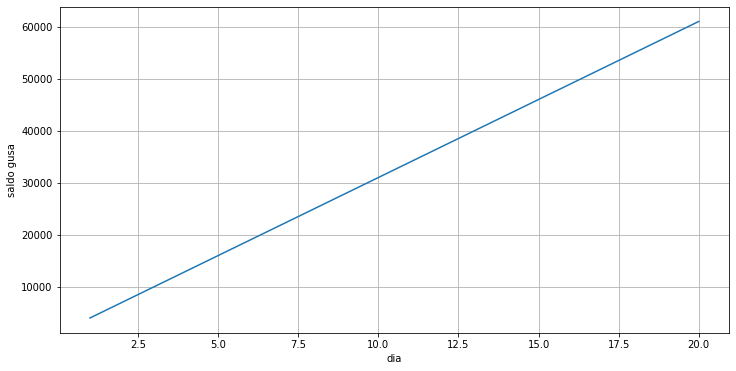

In [ ]:
dados = gera_dados(producao_af, corridas_dia)
def plota_saldo(saldo):
  _, ax1 = plt.subplots(figsize = (12,6))
  ax1.plot(np.arange(1,len(saldo) + 1), saldo)
  ax1.set_xlabel("dia")
  ax1.set_ylabel("saldo gusa")
  ax1.grid()

  plt.show()
saldo = simulador_v0(dados,1000)
plota_saldo(saldo)  

In [ ]:
dados ["AF"] [10:] = 0
saldo = simulador_v0(dados,2000)
plota_saldo(saldo)  

TypeError: ignored

### MODELO v1 - CONSIDERANDO O BASCULAMENTO E LIMITE MÁXIMO:

In [ ]:
dados = gera_dados(producao_af,corridas_dia)
def simulador_v1(dados,saldo_inicial, v_max):
  n_dias = dados.shape[0]
  saldo = np.zeros((n_dias, ))
  basculamento = np.zeros((n_dias))

  for i in range(n_dias):
    if i == 0:
      saldo[i] = saldo_inicial + dados["AF"][i] - (dados["P1"][i] + dados["P2"][i]) * consumo_panela
    else:
      saldo[i] = saldo[i-1] + dados["AF"][i] - (dados["P1"][i] + dados["P2"][i]) * consumo_panela
    if saldo[i] > v_max:
      basculamento[i]= saldo[i]-v_max
      saldo[i] = v_max
  return saldo, basculamento  



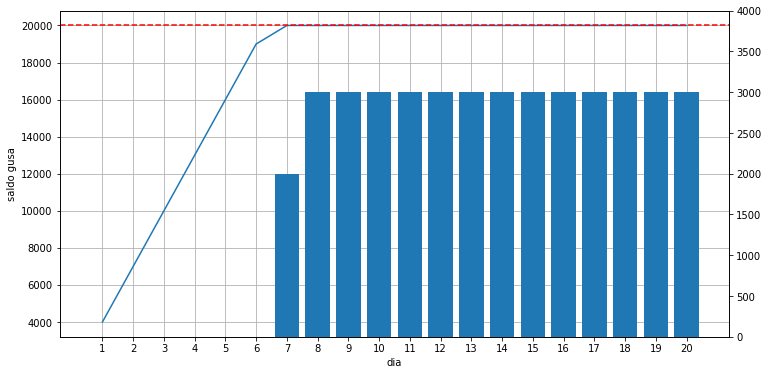

In [ ]:
def plota_saldo(saldo,basculamento,  V_max):
  _, ax1 = plt.subplots(figsize = (12,6))
  ax2 = ax1.twinx()
  x_range = np.arange(1,len(saldo) + 1)
  ax1.plot(np.arange(1,len(saldo) + 1), saldo)
  ax1.axhline(y=V_max, color = "r", linestyle = "--")
  ax1.set_xlabel("dia")
  ax1.set_ylabel("saldo gusa")
  ax1.grid()
  ax2.bar(x_range,basculamento)
  ax2.set_ylim([0,4000])
  ax1.set_xticks(x_range)
  plt.show()
V_max = 20000
V_inicial = 1000
saldo, basculamento = simulador_v1(dados,V_inicial,V_max)
plota_saldo(saldo, basculamento, V_max)  

In [ ]:
dados = gera_dados(producao_af,corridas_dia)
def simulador_v2(dados,saldo_inicial, v_max,gusa_ct):
  n_dias = dados.shape[0]
  saldo = np.zeros((n_dias, ))
  basculamento = np.zeros((n_dias))

  for i in range(n_dias):
    if i == 0:
      saldo[i] = saldo_inicial + dados["AF"][i] - (dados["P1"][i] + dados["P2"][i]) * consumo_panela
    else:
      saldo[i] = saldo[i-1] + dados["AF"][i] - (dados["P1"][i] + dados["P2"][i]) * consumo_panela
    if saldo[i] > v_max:
      #t_d = ((saldo[i]-V_max)//gusa_ct)+1
      t_d = np.ceil((saldo[i]-v_max)// gusa_ct)
      basculamento[i] = t_d*gusa_ct
      saldo[i] = saldo[i] - basculamento[i]
  return saldo, basculamento


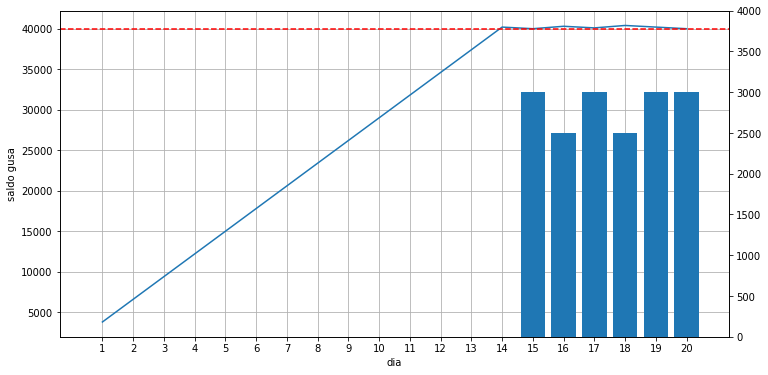

In [ ]:
def plota_saldo(saldo,basculamento,  V_max):
  _, ax1 = plt.subplots(figsize = (12,6))
  ax2 = ax1.twinx()
  x_range = np.arange(1,len(saldo) + 1)
  ax1.plot(np.arange(1,len(saldo) + 1), saldo)
  ax1.axhline(y=V_max, color = "r", linestyle = "--")
  ax1.set_xlabel("dia")
  ax1.set_ylabel("saldo gusa")
  ax1.grid()
  ax2.bar(x_range,basculamento)
  ax2.set_ylim([0,4000])
  ax1.set_xticks(x_range)
  plt.show()
V_max = 40000
V_inicial = 1000
dados["AF"] = dados["AF"] - 200
saldo, basculamento = simulador_v2(dados,V_inicial,V_max,500)
plota_saldo(saldo, basculamento, V_max)  